# Análisis exploratorio de datos (EDA)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Quitamos los FutureWarning para tener el notebook más limpio

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

calendar = pd.read_csv("../data/raw/calendar.csv")
sales = pd.read_csv("../data/raw/sales_train_validation.csv")
prices = pd.read_csv("../data/raw/sell_prices.csv")

# Verifica los tamaños y columnas
print(calendar.shape)
print(sales.shape)
print(prices.shape)

(1969, 14)
(30490, 1919)
(6841121, 4)


## Vamos a entender un poco los datos asociados.
### Empezamos con la información de **calendar**:
1. **date**: Fecha la cual empieza desde el 29 de Enero del 2011.
2. **wm_yr_wk**: Código que combina información de Walmart (wm), año (yr) y semana (wk). Por ejemplo ```11101```:
- ```1``` = Walmart
- ```11``` = año 2011
- ```01``` = primera semana de ventas
3. **weekday**: Día de la semana (Saturday)
4. **wday**: Número de la semana (1~7) empezando como número 1 sabado.
5. **month**: Número del mes.
6. **year**: Año.
7. **d**: Contador de número de días en activo
8. **event_name_1~2**: Festivos o acontecimientos eventuales como columbus day, valentines day, superbowl, christmas...
9. **event_type_1~2**: Se asocia una categoria al evento. (Sporting, Cultural, National, Religious)
10. **snap**: Variables indicadoras del programa SNAP (Supplemental Nutrition Assistance Program) para los estados California, Texas y Wisconsin. Este programa de asistencia nutricional puede influir en la demanda de ciertos productos, ya que beneficia a personas en situación de pobreza y puede generar picos de ventas en alimentos específicos.

**calendar** contiene información temporal y eventos clave que permiten relacionar cada día con fechas específicas, festividades, tipos de eventos y factores externos (como la participación en el programa SNAP) que pueden influir en la demanda de productos en las tiendas.

In [3]:
print(calendar.head())
print(calendar.isnull().sum()) # tenemos nulos en los nombres y tipos de eventos, algo normal ya que no cada día hay una festividad

         date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1  
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d  

### Información de **sales_train_validation**:
Contiene las ventas diarias históricas de cada producto por tienda:
1. **id**: Identificador único del producto en la tienda. ```item_id + store_id```
2. **item_id**: Identificador del producto.
3. **dept_id**: Departamento del producto.
4. **cat_id**: Categoría del producto.
5. **store_id**: Tienda.
6. **state_id**: Estado en el que está dentro de estados unidos (California, texas, Wisconsin).
7. **d_1~d_1913**: Ventas diarias para cada día (d_1 es el primer día registrado).

**sales_train_validation** contiene el historial diario de ventas (de 1,913 días) por producto y tienda. Cada fila representa un producto específico en una tienda, con columnas que indican cuántas unidades se vendieron en cada día. Es la base principal para analizar la demanda a lo largo del tiempo.

In [4]:
print(sales.head())
print(sales.isnull().sum()) # No podemos verificar del todo 100% si las 1919 columnas no tienen valores nulos
print(f"\nEl número total de nulos es de: {sales.isnull().sum().sum()}") # Confirmamos que el archivo esta libre de nulos, toda la información es completa

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  


### Información de sell_prices:
Contiene el precio de venta de cada producto por tienda y semana.
1. **store_id**: Identificador de la tienda.
2. **item_id**: Identificador del producto.
3. **wm_yr_wk**: Código que combina información de Walmart (wm), año (yr) y semana (wk)
4. **sell_price**: Precio de venta del producto en esa tienda y semana.

**sell_prices** es clave para analizar la variación de precios a lo largo del tiempo y su impacto en la demanda.

In [5]:
print(prices.head())
print(f"\n{prices.isnull().sum()}") # No tenemos valores nulos con lo cual tenemos un archivo limpio con información completa

  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64


# EMPEZAR AQUI

Distribución de ventas por día:

        date  sales
0 2011-01-29  32631
1 2011-01-30  31749
2 2011-01-31  23783
3 2011-02-01  25412
4 2011-02-02  19146

Estadísticas descriptivas de ventas:
count     1913.00
mean     34341.56
std       7345.91
min         11.00
25%      29654.00
50%      33732.00
75%      38689.00
max      57218.00
Name: sales, dtype: object


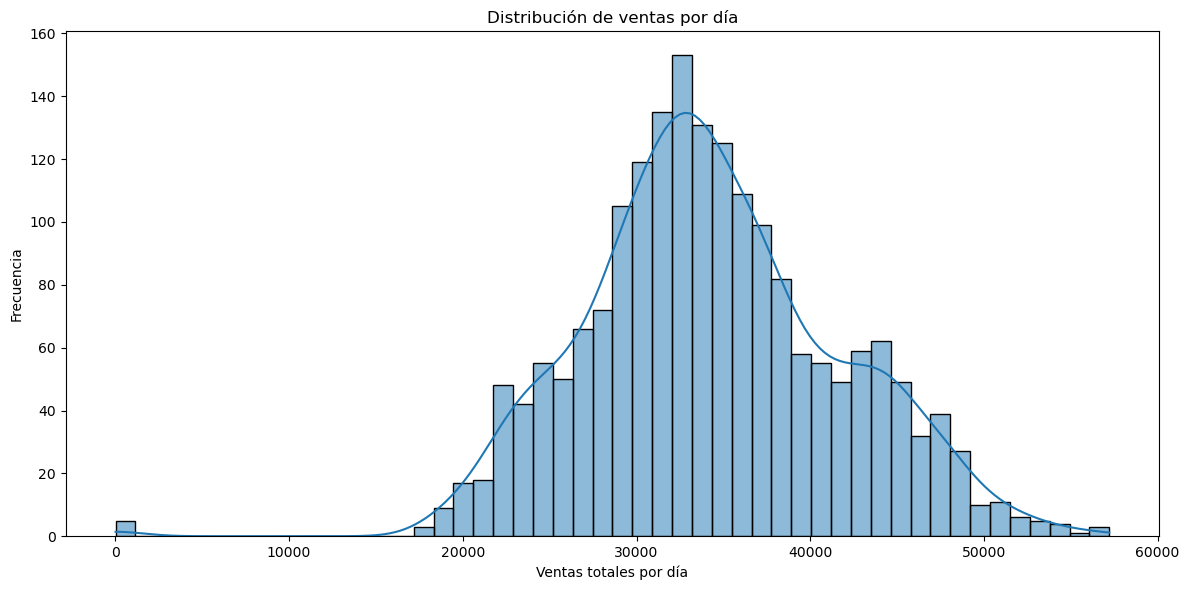

In [6]:
sales_long = sales.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
    var_name='d', 
    value_name='sales'
)
# Unimos para obtener fechas reales (calendar tiene 'd' y 'date')
sales_long = sales_long.merge(calendar[['d', 'date']], on='d', how='left')

# Agrupamos ventas por fecha
ventas_por_dia = sales_long.groupby('date')['sales'].sum().reset_index()

# Convertimos la columna 'date' a datetime
ventas_por_dia['date'] = pd.to_datetime(ventas_por_dia['date'])
# Ordenamos por fecha
ventas_por_dia = ventas_por_dia.sort_values('date')
print(ventas_por_dia.head())
print(f"\nEstadísticas descriptivas de ventas:\n{ventas_por_dia['sales'].describe().apply('{0:.2f}'.format)}")
# Visualizamos el contenido
plt.figure(figsize=(12,6))
sns.histplot(ventas_por_dia['sales'], bins=50, kde=True)
plt.title('Distribución de ventas por día')
plt.xlabel('Ventas totales por día')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


% de valores nulos por columna en prices:
store_id      0.0
item_id       0.0
wm_yr_wk      0.0
sell_price    0.0
dtype: float64

Productos únicos: 3049
Departamentos únicos: 7
Categorías únicas: 3
Tiendas únicas: 10
Estados únicos: 3

Ventas totales por día:
        date  sales
0 2011-01-29  32631
1 2011-01-30  31749
2 2011-01-31  23783
3 2011-02-01  25412
4 2011-02-02  19146

Estadísticas descriptivas de ventas:
count     1913.00
mean     34341.56
std       7345.91
min         11.00
25%      29654.00
50%      33732.00
75%      38689.00
max      57218.00
Name: sales, dtype: object


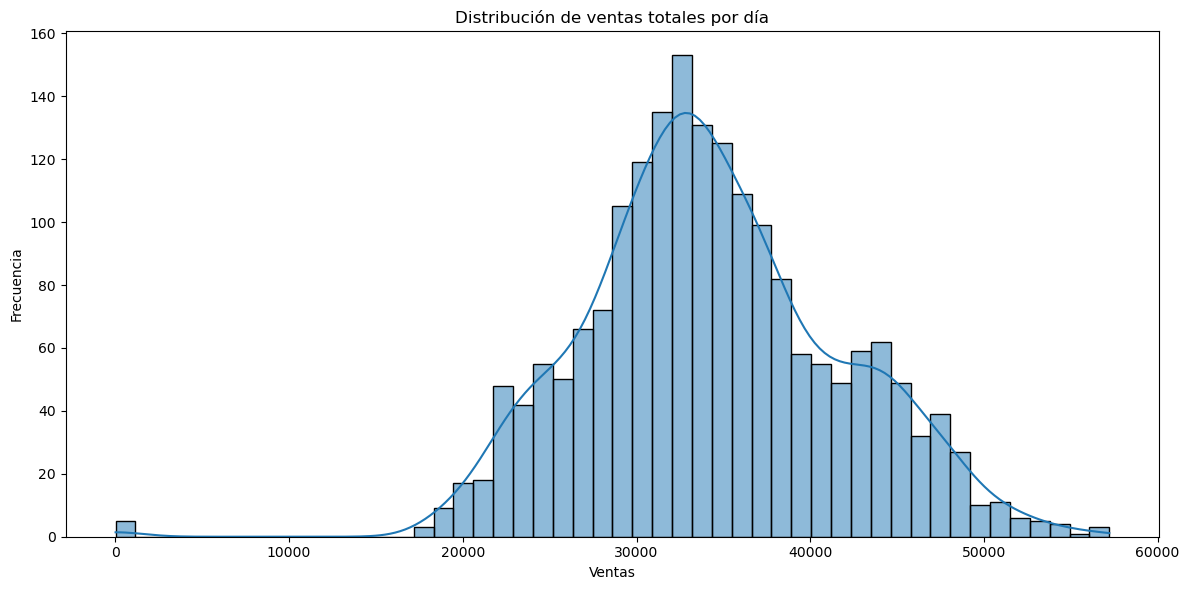

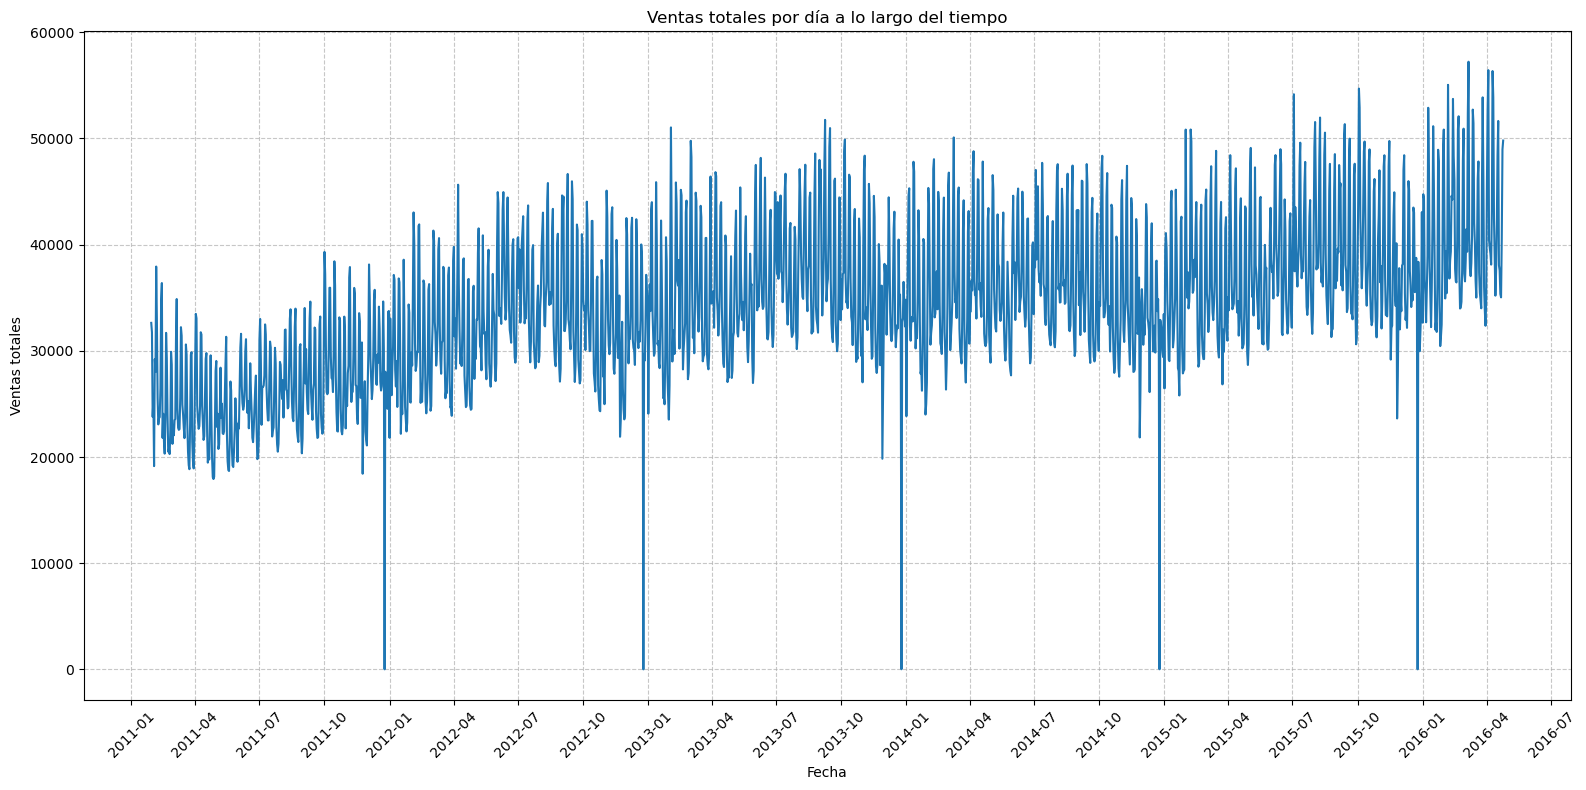

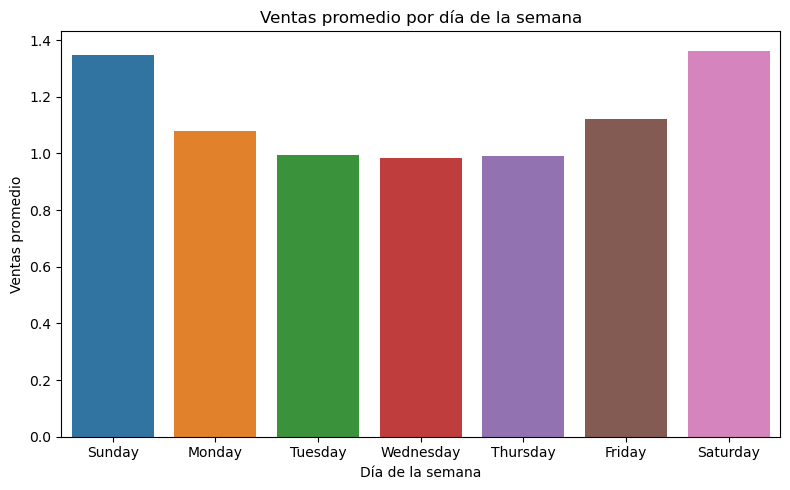

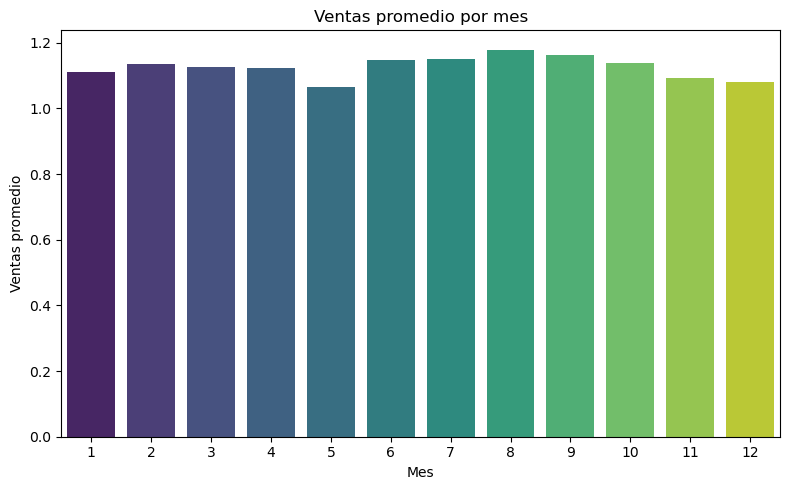

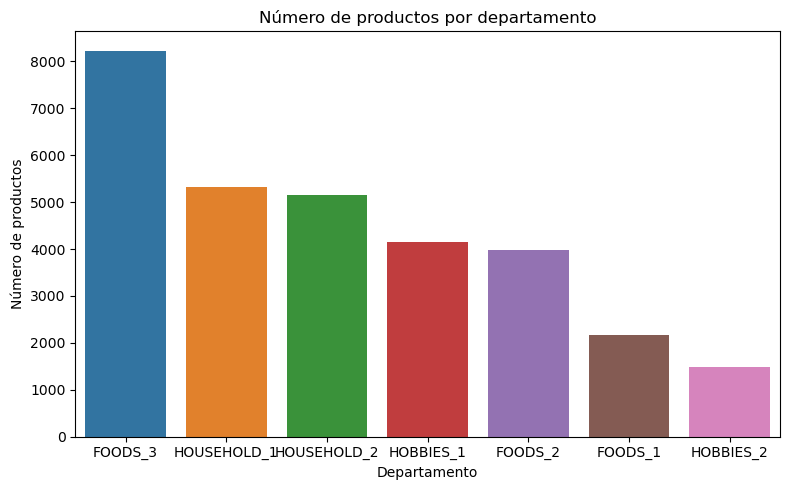

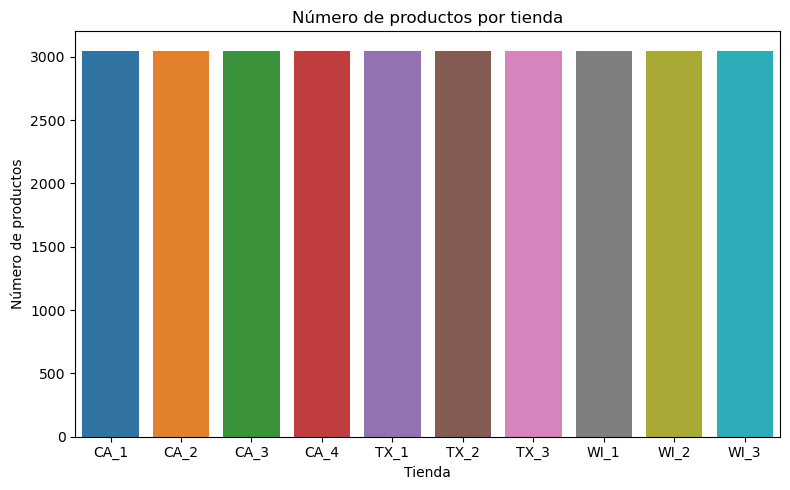

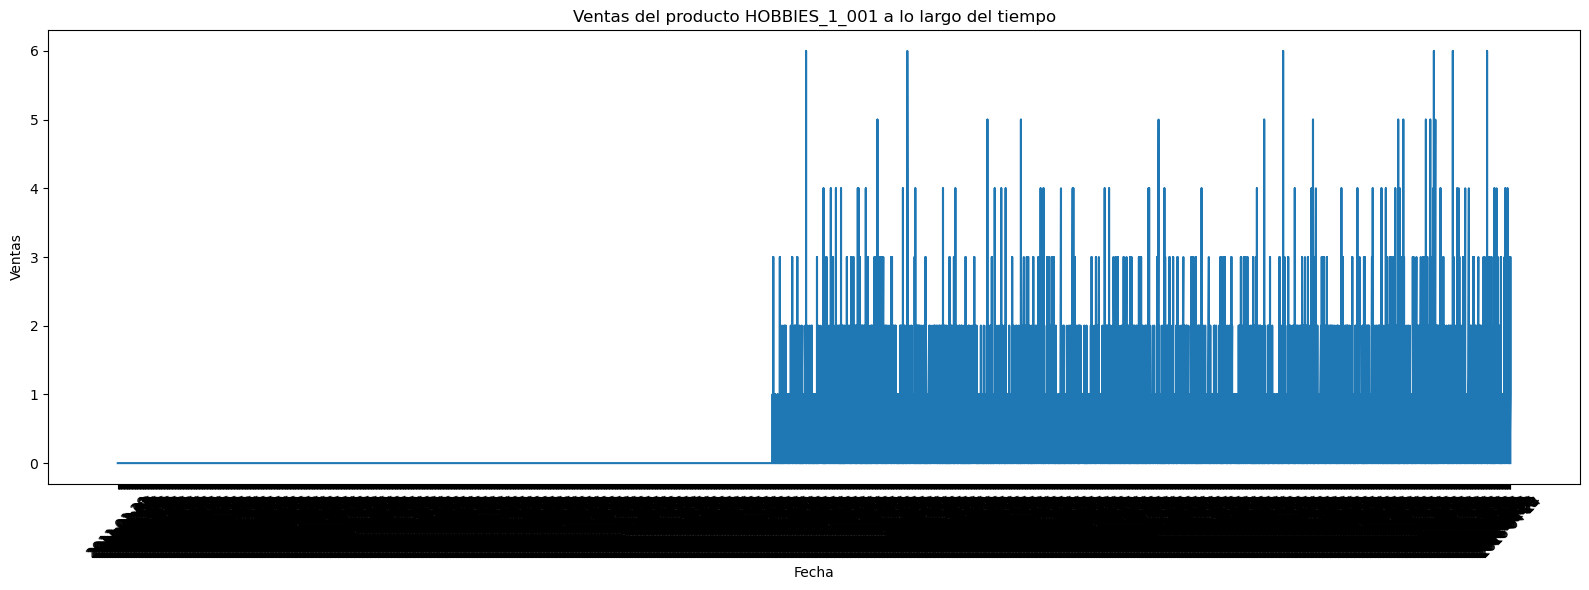

In [7]:
#cosas en las que trabajar

print("\n% de valores nulos por columna en prices:")
print(prices.isnull().mean())

# Número de productos, tiendas, categorías únicas
print(f"\nProductos únicos: {sales['item_id'].nunique()}")
print(f"Departamentos únicos: {sales['dept_id'].nunique()}")
print(f"Categorías únicas: {sales['cat_id'].nunique()}")
print(f"Tiendas únicas: {sales['store_id'].nunique()}")
print(f"Estados únicos: {sales['state_id'].nunique()}")

# -------------------- Ventas por día (serie temporal y distribución) --------------------

# Transformar a formato largo para análisis temporal
sales_long = sales.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
    var_name='d', 
    value_name='sales'
)

# Unir con calendario para fechas
sales_long = sales_long.merge(calendar[['d', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1']], on='d', how='left')

# Ventas totales por día
ventas_por_dia = sales_long.groupby('date')['sales'].sum().reset_index()
ventas_por_dia['date'] = pd.to_datetime(ventas_por_dia['date'])
ventas_por_dia = ventas_por_dia.sort_values('date')

print("\nVentas totales por día:")
print(ventas_por_dia.head())

# Estadísticas descriptivas
print(f"\nEstadísticas descriptivas de ventas:\n{ventas_por_dia['sales'].describe().apply('{0:.2f}'.format)}")

# Histograma de ventas diarias
plt.figure(figsize=(12,6))
sns.histplot(ventas_por_dia['sales'], bins=50, kde=True)
plt.title('Distribución de ventas totales por día')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Serie temporal ventas diarias
plt.figure(figsize=(16, 8))
plt.plot(ventas_por_dia['date'], ventas_por_dia['sales'], linewidth=1.5)
plt.title('Ventas totales por día a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas totales')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -------------------- Análisis temporal adicional --------------------

# Ventas promedio por día de la semana
ventas_por_dia_semana = sales_long.groupby('weekday')['sales'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=ventas_por_dia_semana, x='weekday', y='sales', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Ventas promedio por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Ventas promedio')
plt.tight_layout()
plt.show()

# Ventas promedio por mes
ventas_por_mes = sales_long.groupby('month')['sales'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=ventas_por_mes, x='month', y='sales', palette='viridis')
plt.title('Ventas promedio por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas promedio')
plt.tight_layout()
plt.show()

# -------------------- Análisis por categorías --------------------

# Conteo de productos por departamento
plt.figure(figsize=(8,5))
dept_counts = sales['dept_id'].value_counts()
sns.barplot(x=dept_counts.index, y=dept_counts.values)
plt.title('Número de productos por departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de productos')
plt.tight_layout()
plt.show()

# Conteo de productos por tienda
plt.figure(figsize=(8,5))
store_counts = sales['store_id'].value_counts()
sns.barplot(x=store_counts.index, y=store_counts.values)
plt.title('Número de productos por tienda')
plt.xlabel('Tienda')
plt.ylabel('Número de productos')
plt.tight_layout()
plt.show()

# -------------------- Outliers: Ventas de productos seleccionados --------------------

# Elegir un producto para analizar ventas
prod_id = sales['item_id'].unique()[0]  # tomar el primero para ejemplo
prod_sales = sales_long[sales_long['item_id'] == prod_id]

plt.figure(figsize=(16,6))
plt.plot(prod_sales['date'], prod_sales['sales'])
plt.title(f'Ventas del producto {prod_id} a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()